In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-data/data.csv


In [77]:
ecommerce_data = pd.read_csv('/kaggle/input/ecommerce-data/data.csv',encoding='unicode_escape')
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [78]:
ecommerce_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [79]:
ecommerce_data.shape

(541909, 8)

In [80]:
ecommerce_data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [81]:
ecommerce_data[ecommerce_data.duplicated(subset=['InvoiceNo','StockCode'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,12/1/2010 9:41,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,12/1/2010 11:45,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,12/1/2010 11:45,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,12/1/2010 11:45,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,12/9/2011 11:34,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,12/9/2011 11:34,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [82]:
ecommerce_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [83]:
ecommerce_data = ecommerce_data.dropna()

In [84]:
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Calculate RFM - Recency, Frequency and Monetary Value

In [85]:
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['InvoiceDate'])
ecommerce_data['Rank'] = ecommerce_data.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
ecommerce_data_recent = ecommerce_data[ecommerce_data['Rank']==1]

In [86]:
ecommerce_data_recent['Recency'] = (ecommerce_data_recent['Date'] - pd.to_datetime(min(ecommerce_data_recent['Date']))).dt.days

In [87]:
freq = ecommerce_data_recent.groupby('CustomerID')['Date'].count()
ecommerce_data_frequent = pd.DataFrame(freq).reset_index()
ecommerce_data_frequent.columns = ['CustomerID','Frequency']

In [88]:
rec_freq = ecommerce_data_frequent.merge(ecommerce_data_recent, on='CustomerID')

In [89]:
rec_freq.head()

,CustomerID,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,Rank,Recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


In [90]:
rec_freq['Total'] = rec_freq['Quantity']*rec_freq['UnitPrice']
mon_value = rec_freq.groupby('CustomerID')['Total'].sum()
ecommerce_data_monetary = pd.DataFrame(mon_value).reset_index()
ecommerce_data_monetary.columns = ['CustomerID','MonetaryValue']

In [91]:
rfm = ecommerce_data_monetary.merge(rec_freq, on='CustomerID')
rfm.head()

,CustomerID,MonetaryValue,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,Rank,Recency,Total
0,12346.0,77183.60,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,77183.6
1,12347.0,711.79,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,25.2
2,12347.0,711.79,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,17.0
3,12347.0,711.79,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,39.0
4,12347.0,711.79,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,23.4


In [93]:
customer_rfm = rfm[['CustomerID','Recency','Frequency','MonetaryValue']]

Recency: 


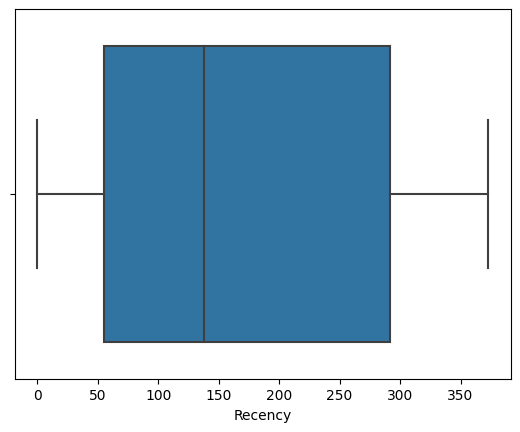

Frequency: 


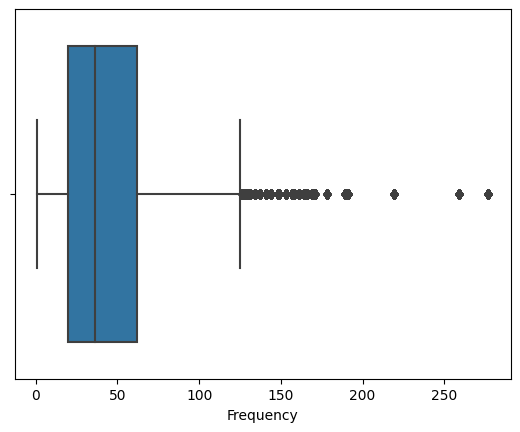

MonetaryValue: 


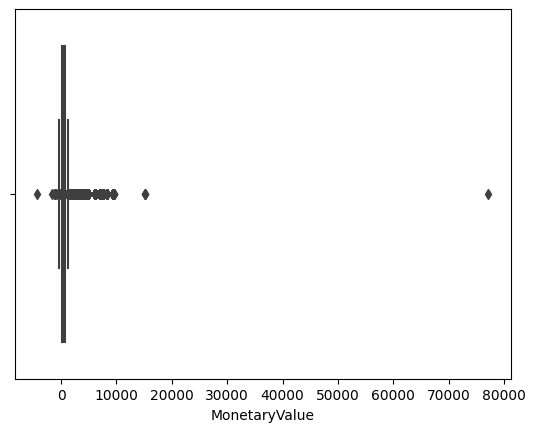

In [94]:
#Check for Outliers

import seaborn as sns
import matplotlib.pyplot as plt
indicator_list = ['Recency','Frequency','MonetaryValue']
for i in indicator_list:
    print(str(i)+': ')
    ax = sns.boxplot(x=customer_rfm[str(i)])
    plt.show()

In [95]:
from scipy import stats

z_scores = stats.zscore(customer_rfm)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
customer_rfm = customer_rfm[filtered_entries]

In [97]:
customer_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
1,12347.0,6,31,711.79
2,12347.0,6,31,711.79
3,12347.0,6,31,711.79
4,12347.0,6,31,711.79
5,12347.0,6,31,711.79


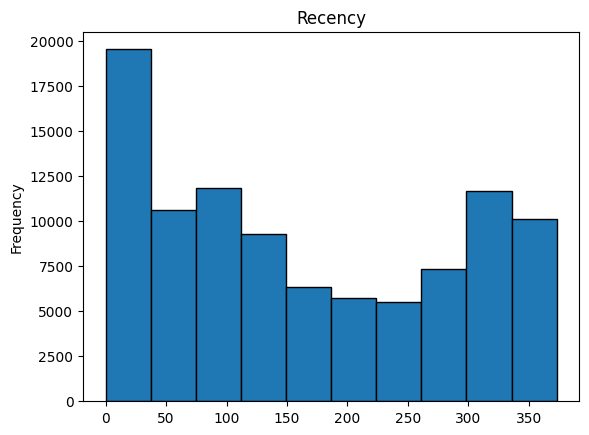

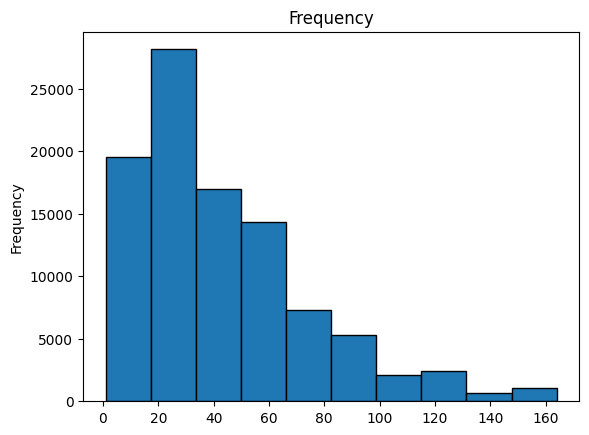

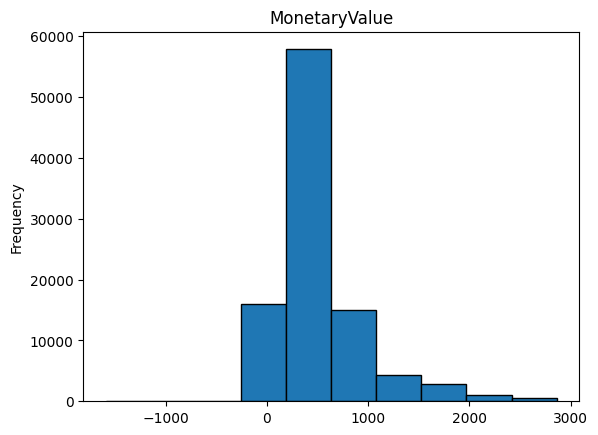

In [103]:
customer_rfm['Recency'].plot(kind='hist', edgecolor='black' , title='Recency')
plt.show()
customer_rfm['Frequency'].plot(kind='hist', edgecolor='black' , title='Frequency')
plt.show()
customer_rfm['MonetaryValue'].plot(kind='hist', edgecolor='black' , title='MonetaryValue')
plt.show()

In [109]:
from sklearn.preprocessing import StandardScaler
customer_rfm = customer_rfm.drop_duplicates()
col_names = ['Recency','Frequency','MonetaryValue']
features = customer_rfm[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

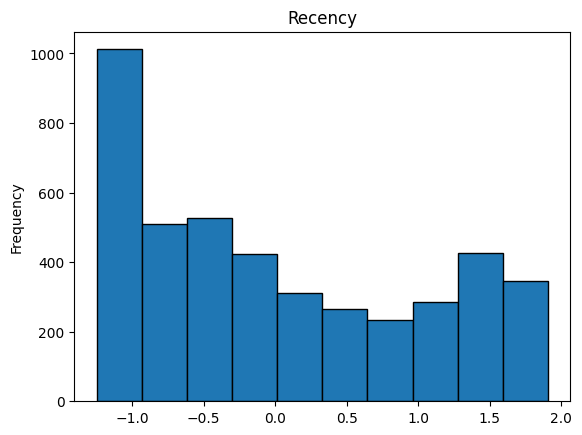

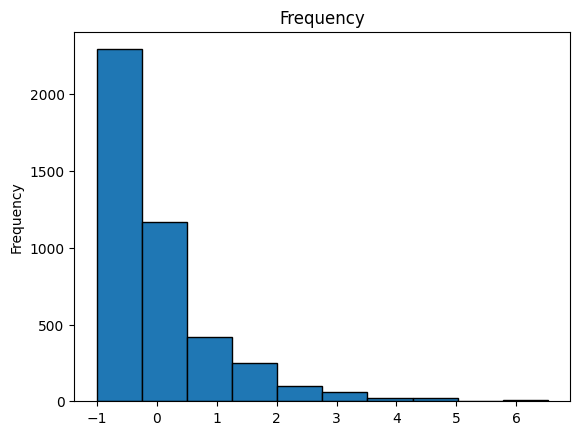

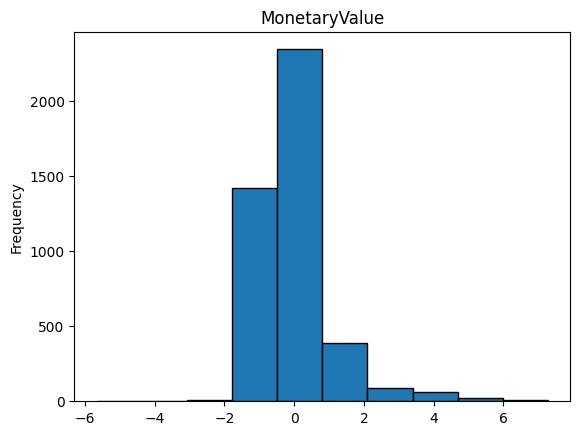

In [107]:
customer_rfm['Recency'].plot(kind='hist', edgecolor='black' , title='Recency')
plt.show()
customer_rfm['Frequency'].plot(kind='hist', edgecolor='black' , title='Frequency')
plt.show()
customer_rfm['MonetaryValue'].plot(kind='hist', edgecolor='black' , title='MonetaryValue')
plt.show()

Text(0, 0.5, 'Inertia')

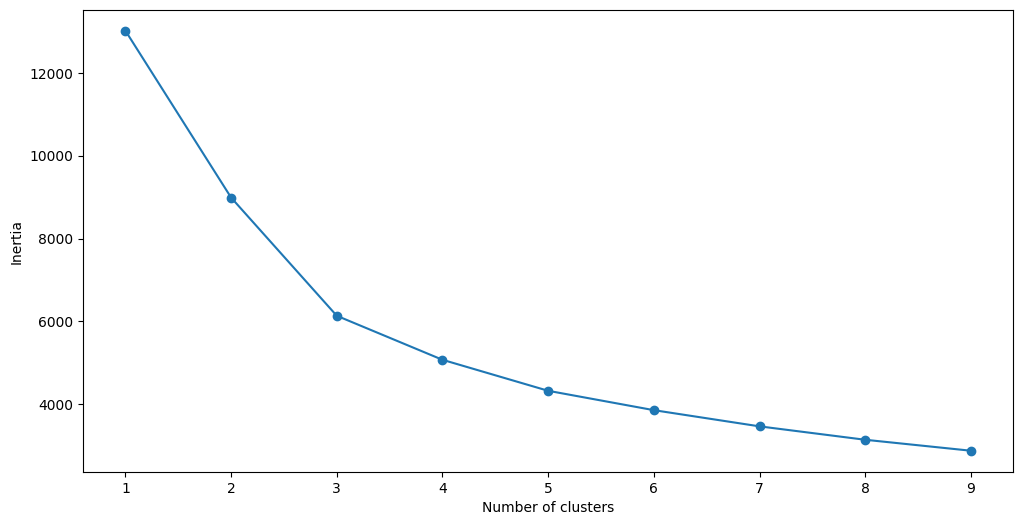

In [110]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [111]:
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [112]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.404414848327726


In [114]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(customer_rfm)
frame['cluster'] = pred

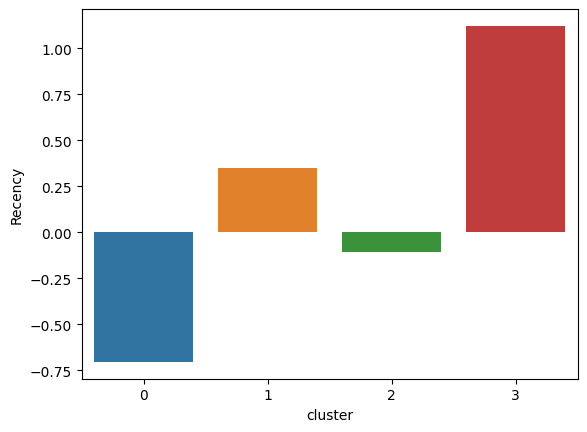

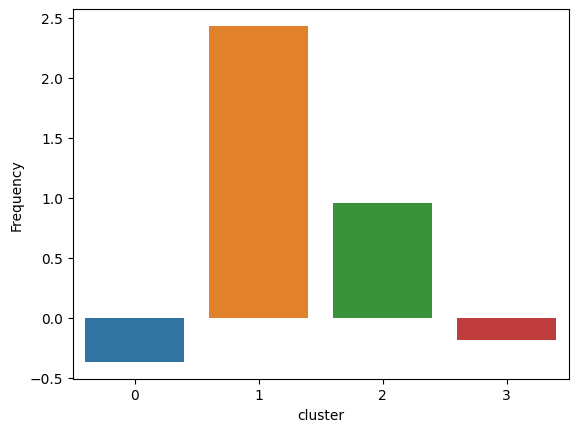

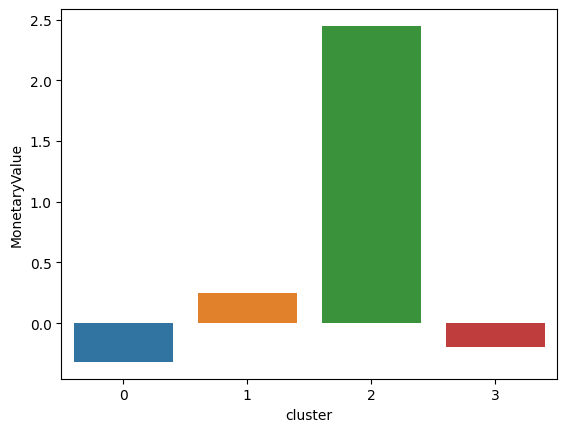

In [116]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in indicator_list:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()